In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
word_index=reuters.get_word_index()

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
decoded_newswire=''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[10]

3

In [8]:
print(decoded_newswire)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models 
from keras import layers
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 112us/step - loss: 2.6262 - accuracy: 0.5292 - val_loss: 1.7894 - val_accuracy: 0.6080
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.4558 - accuracy: 0.6858 - val_loss: 1.3650 - val_accuracy: 0.6750
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0894 - accuracy: 0.7600 - val_loss: 1.1682 - val_accuracy: 0.7390
Epoch 4/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.8716 - accuracy: 0.8131 - val_loss: 1.0869 - val_accuracy: 0.7650
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.7052 - accuracy: 0.8510 - val_loss: 1.0324 - val_accuracy: 0.7670
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.5654 - accuracy: 0.8804 - val_loss: 0.9387 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.4

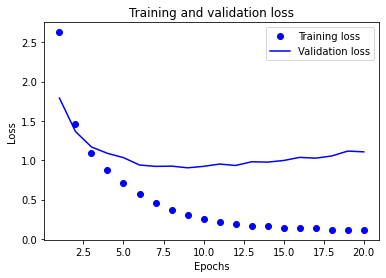

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

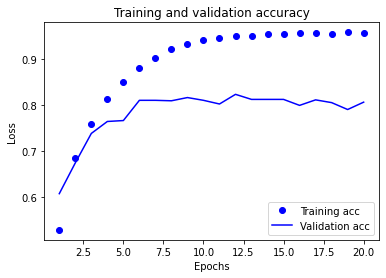

In [17]:
plt.clf()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 101us/step - loss: 2.5297 - accuracy: 0.5117 - val_loss: 1.6863 - val_accuracy: 0.6460
Epoch 2/9
7982/7982 [==============================] - 1s 98us/step - loss: 1.4105 - accuracy: 0.7035 - val_loss: 1.3240 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.0645 - accuracy: 0.7739 - val_loss: 1.1772 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.8396 - accuracy: 0.8241 - val_loss: 1.0753 - val_accuracy: 0.7550
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6687 - accuracy: 0.8592 - val_loss: 1.0050 - val_accuracy: 0.7800
Epoch 6/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.5363 - accuracy: 0.8887 - val_loss: 0.9782 - val_accuracy: 0.7950
Epoch 7/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.4366 - 

In [19]:
results

[0.9922802768853342, 0.7836152911186218]